<a href="https://colab.research.google.com/github/MonikSense/GLAUCOMA/blob/main/Gaussianblurimages3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Processing folder: Images


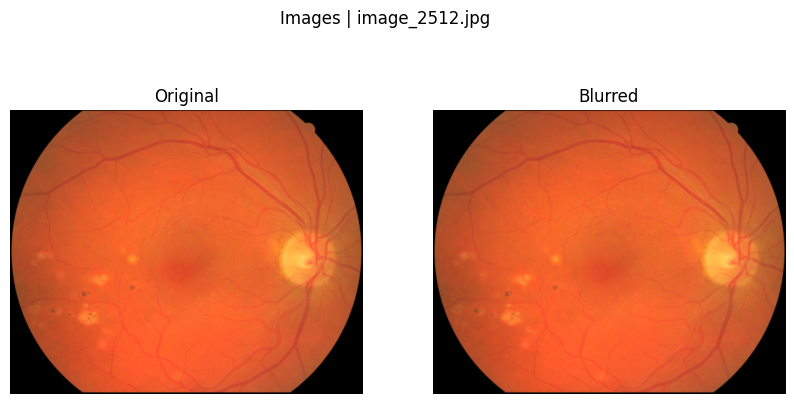

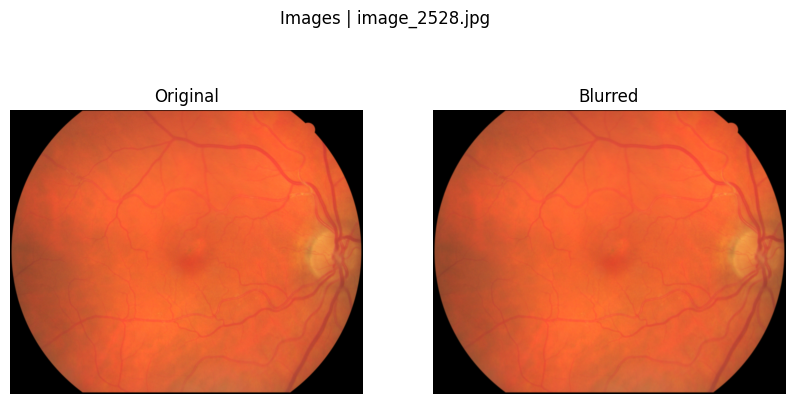

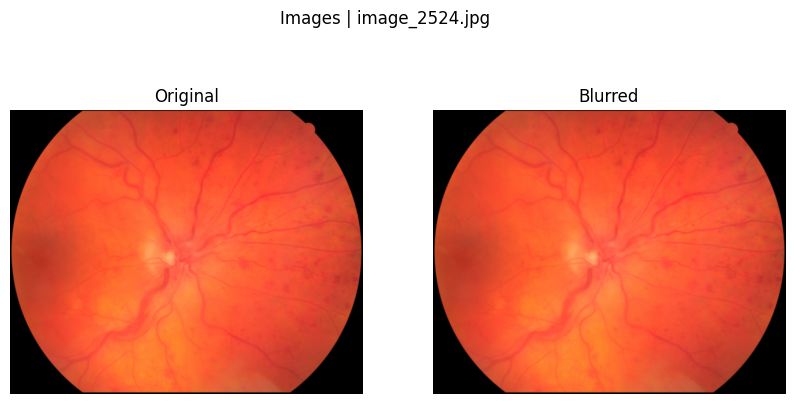

Processed 1020 images in folder: Images

Processing folder: Images_Cropped


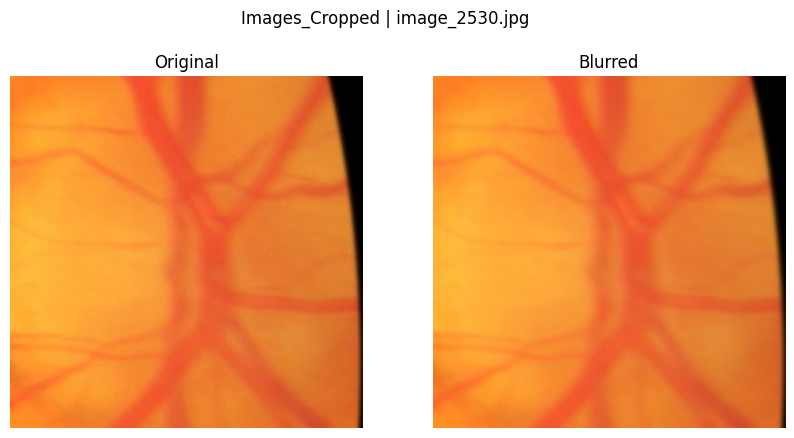

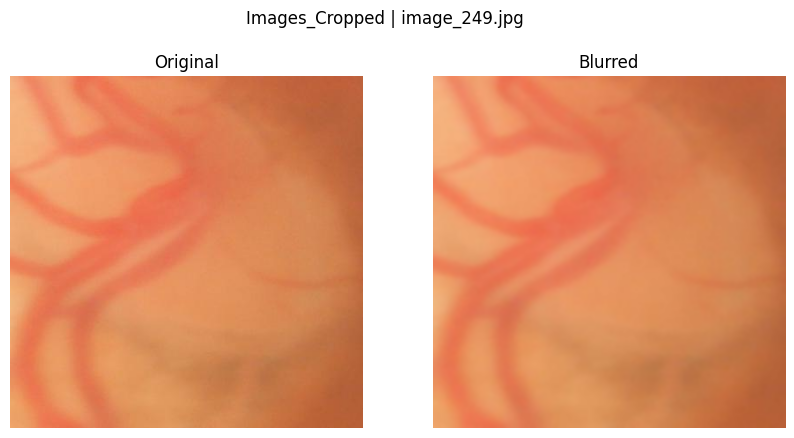

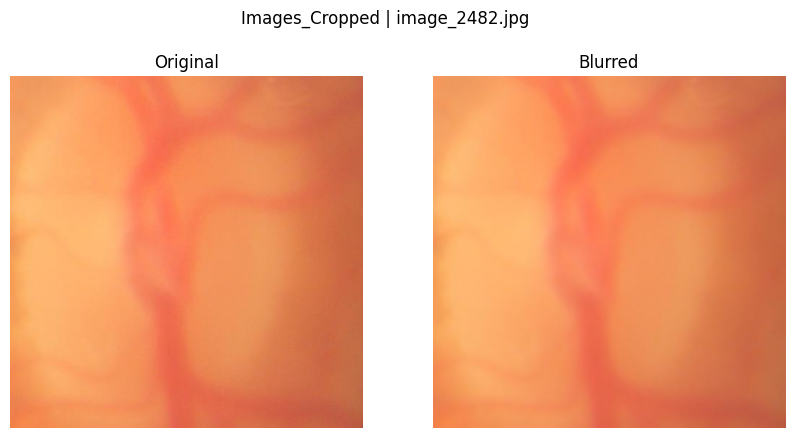

Processed 20 images in folder: Images_Cropped

Processing folder: Images_Square


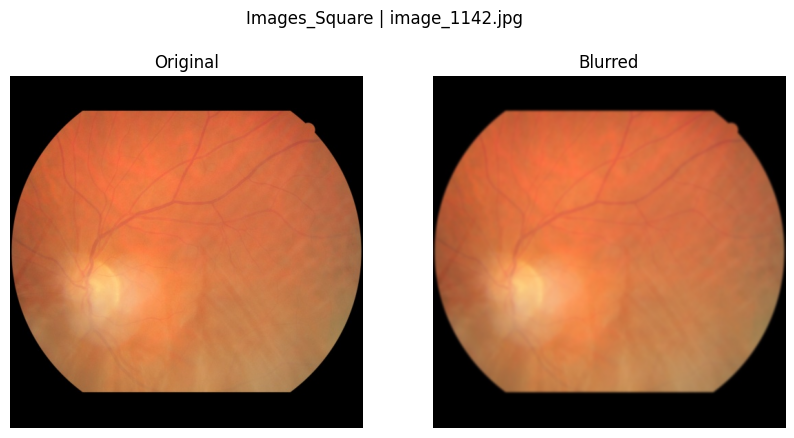

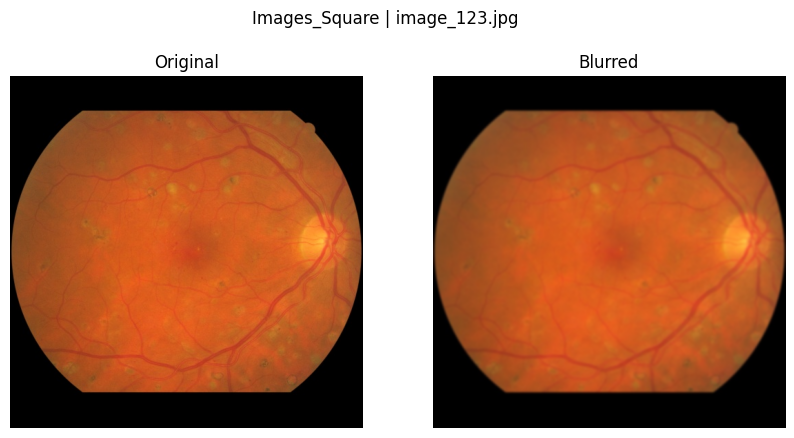

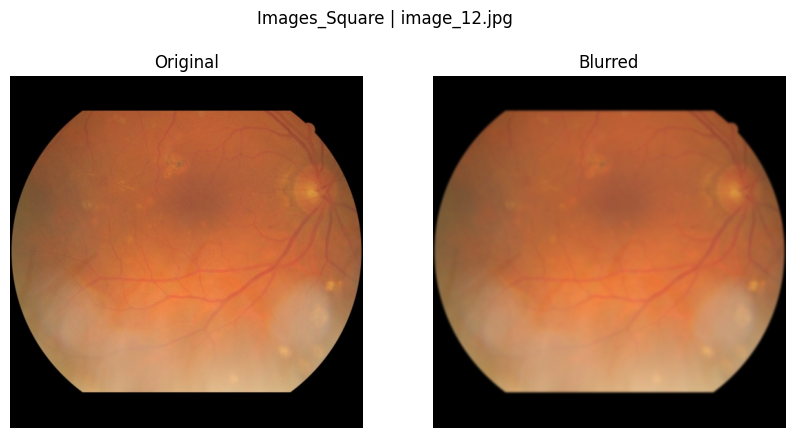

Processed 1020 images in folder: Images_Square

Use the slider below to browse images in each folder:


interactive(children=(Dropdown(description='folder_name', options=('Images', 'Images_Cropped', 'Images_Square'…

<function __main__.browse_images(folder_name, index=0)>

In [3]:
# ===============================
# IMPORTS
# ===============================
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# ===============================
# MOUNT GOOGLE DRIVE
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# Base directory in your Drive where folders are
base_dir = "/content/drive/MyDrive/GlaucomaDataset/G1020"  # CHANGE this

# List of image folders to process (skip mask folders)
folders = ["Images", "Images_Cropped", "Images_Square"]

# Gaussian blur parameters
kernel_size = (7, 7)
sigma = 0

# Function to display original vs blurred
def show_before_after(original, blurred, title=""):
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(original_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(blurred_rgb)
    plt.title("Blurred")
    plt.axis("off")

    if title:
        plt.suptitle(title)
    plt.show()

# ===============================
# PROCESS ALL FOLDERS
# ===============================
all_blurred_images = {}  # For slider

for folder in folders:
    print(f"\nProcessing folder: {folder}")
    image_dir = os.path.join(base_dir, folder)
    output_dir = os.path.join(base_dir, "blurred_" + folder)
    os.makedirs(output_dir, exist_ok=True)

    blurred_images = []  # list of filenames for this folder

    for img_name in os.listdir(image_dir):
        if not img_name.lower().endswith((".jpg",".jpeg",".png")):
            continue

        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Cannot read: {img_name}")
            continue

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(img, kernel_size, sigma)

        # Save blurred image
        save_path = os.path.join(output_dir, img_name)
        cv2.imwrite(save_path, blurred)

        blurred_images.append(img_name)

        # Preview first 3 images
        if len(blurred_images) <= 3:
            show_before_after(img, blurred, title=f"{folder} | {img_name}")

    all_blurred_images[folder] = blurred_images
    print(f"Processed {len(blurred_images)} images in folder: {folder}")

# ===============================
# INTERACTIVE SLIDER TO BROWSE IMAGES
# ===============================
def browse_images(folder_name, index=0):
    image_dir = os.path.join(base_dir, folder_name)
    output_dir = os.path.join(base_dir, "blurred_" + folder_name)

    img_list = all_blurred_images.get(folder_name, [])
    if not img_list:
        print("No images found in this folder.")
        return

    index = max(0, min(index, len(img_list)-1))
    img_name = img_list[index]

    img_path = os.path.join(image_dir, img_name)
    blurred_path = os.path.join(output_dir, img_name)

    img = cv2.imread(img_path)
    blurred = cv2.imread(blurred_path)

    if img is None or blurred is None:
        print(f"Cannot read image: {img_name}")
        return

    show_before_after(img, blurred, title=f"{folder_name} | {img_name}")

# Create interactive slider for folder selection and image index
folder_options = folders
print("\nUse the slider below to browse images in each folder:")
interact(browse_images, folder_name=folder_options, index=(0, 2, 1))  # index will update dynamically
